In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
### Part 1: Understanding Product Categories
#**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
#1. **Frequency Tables**:
#    - Generate a frequency table for the product `category`.
#    - Which are the top 5 most listed product categories?

In [4]:
#Frequency table for product categories
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [5]:
# Top 5 most listed product categories
top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [6]:
#2. **Visualizations**:
#    - Display the distribution of products across different categories using a bar chart. 
#       *If you face problems understanding the chart, do it for a subset of top categories.*
#    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\marta\AppData\Local\Temp\ipykernel_28100\2447396351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");


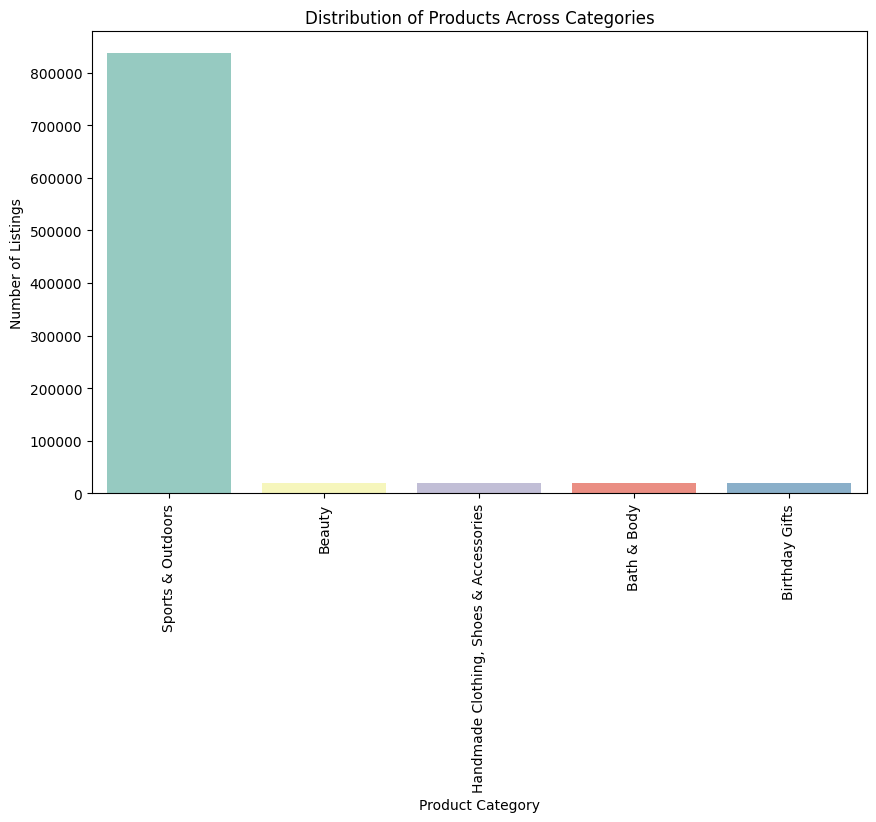

In [7]:
# Plotting a bar chart using the values from the top5 categories
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");
plt.xticks(rotation=90)
plt.title('Distribution of Products Across Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.show()

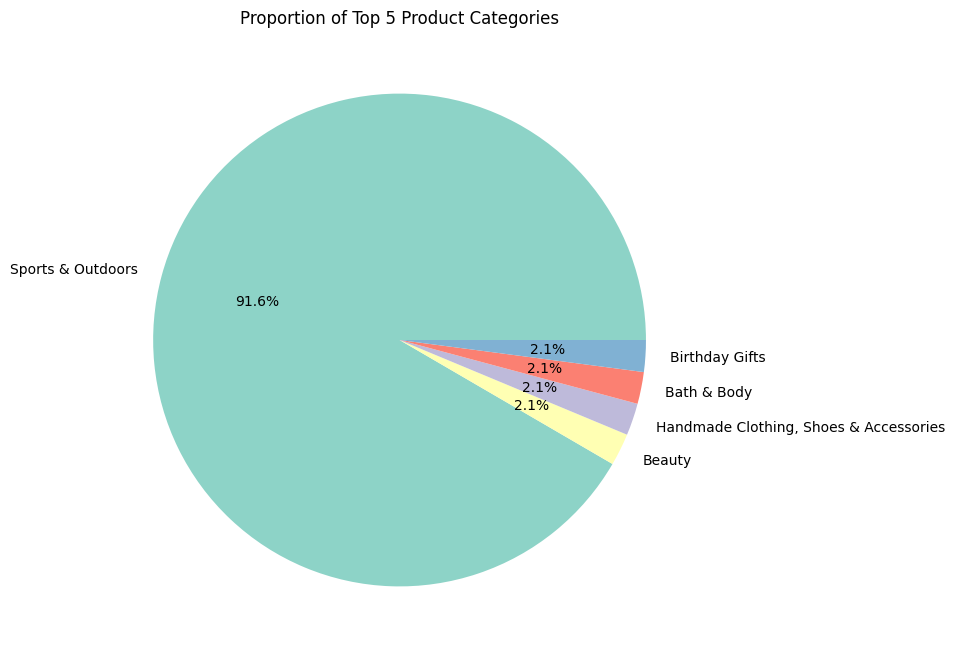

In [8]:
#pie chart for the top 5 categories
plt.figure(figsize=(8,8))
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Proportion of Top 5 Product Categories')
plt.show()

In [9]:
#Sports & Outdoors appears to dominate the listings among the top 5 categories.

In [10]:
### Part 2: Delving into Product Pricing
#**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
#1. **Measures of Centrality**:
#    - Calculate the mean, median, and mode for the `price` of products.
#    - What's the average price point of products listed? How does this compare with the most common price point (mode)?
# Calculate statistics for price

df['price'].dtypes

dtype('float64')

In [ ]:
# Calculate statistics for price
print((f"La media es {df['price'].mean()}"))
print((f'la mediana es {df["price"].median()}'))
print((f'la moda es {df["price"].mode()}'))


La media es 89.24380943923661
la mediana es 19.09
la moda es 0    9.99
Name: price, dtype: float64


The price distribution is highly right-skewed.
The mean price (89.24) is much higher than both the median (19.09) and the mode (9.99), indicating the presence of a small number of extremely high-priced products that inflate the average.
The median provides a far more realistic representation of the typical product price.
The mode at 9.99 shows that the most common items in the catalogue are low-priced, reinforcing that the dataset follows a long-tail distribution, with many cheap products and a minority of very expensive outliers.

In [ ]:
#Measures of Dispersion:

#Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?

variance = df['price'].var()
std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(f'Variance: {variance}')
print(f'Standard Deviation: {std_dev}')
print(f'Range: {price_range}')
print(f'Interquartile Range (IQR): {IQR}')



Variance: 119445.48532254901
Standard Deviation: 345.60886175349873
Range: 100000.0
Interquartile Range (IQR): 36.0


The variance (119,445.49) and standard deviation (345.61) confirm that product prices are extremely dispersed, far beyond what would be expected in a typical pricing distribution.
The range of 100,000 highlights the presence of extreme high-price values that strongly distort the distribution.

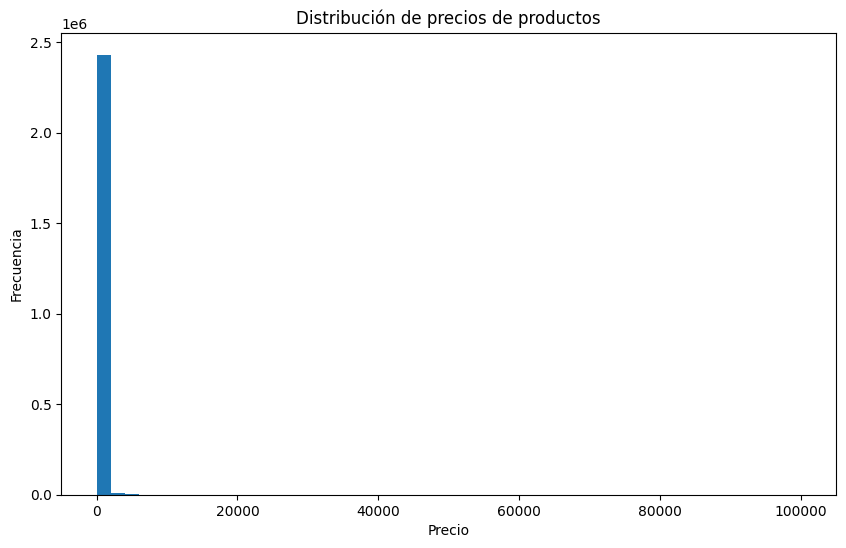

In [32]:
# Visualizations:

#Is there a specific price range where most products fall? 
# Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["price"], bins=50)
plt.title("Distribución de precios de productos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()




In [24]:
df["price"].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 0.999])


0.500      19.09
0.750      45.99
0.900     149.99
0.950     349.50
0.990    1408.82
0.999    4404.99
Name: price, dtype: float64

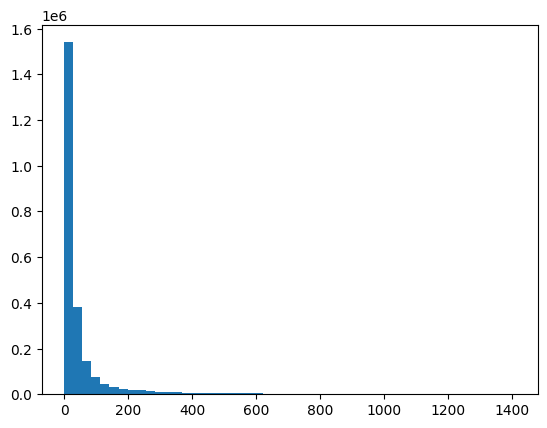

In [ ]:
#Fix it: removing outliers above the 99th percentile
p99 = df["price"].quantile(0.99)
filtered = df[df["price"] <= p99]

plt.hist(filtered["price"], bins=50)
plt.show()




After removing prices above the 99th percentile to eliminate extreme outliers, the histogram becomes readable and shows the true underlying distribution of product prices.

In [16]:
df["price"].describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

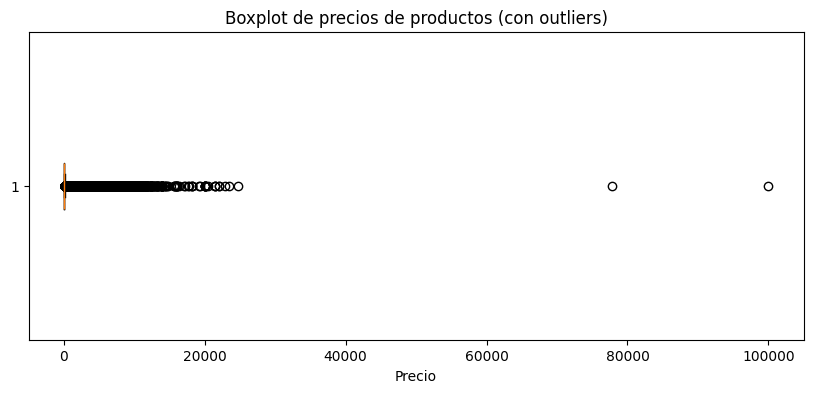

In [25]:
#Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.
plt.figure(figsize=(10,4))
plt.boxplot(df["price"], vert=False)
plt.title("Boxplot de precios de productos (con outliers)")
plt.xlabel("Precio")
plt.show()


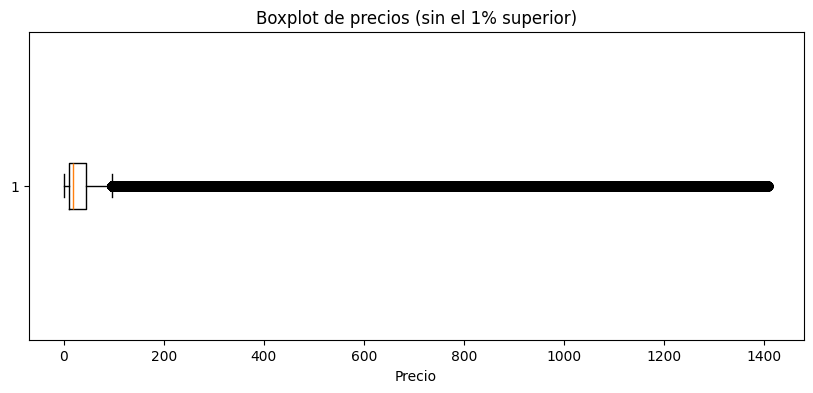

In [26]:
p99 = df["price"].quantile(0.99)
filtered = df[df["price"] <= p99]

plt.figure(figsize=(10,4))
plt.boxplot(filtered["price"], vert=False)
plt.title("Boxplot de precios (sin el 1% superior)")
plt.xlabel("Precio")
plt.show()


In [ ]:
#Part 3: Unpacking Product Ratings
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [28]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]
print(f'Mean Rating: {mean_rating}')
print(f'Median Rating: {median_rating}')
print(f'Mode Rating: {mode_rating}')



Mean Rating: 2.152836472966066
Median Rating: 0.0
Mode Rating: 0.0


The rating distribution is extremely right-skewed.
Both the median and mode are 0, indicating that at least half of the products have no rating and that zero is the most frequently occurring value.
The mean rating (2.15) is considerably higher than the median because a small subset of products receives higher scores, which elevates the average.

In [29]:
#Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating -> stars.
#Are the ratings consistent, or is there a wide variation in customer feedback?
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
Q1_rating = df['stars'].quantile(0.25)
Q3_rating = df['stars'].quantile(0.75)  
IQR_rating = Q3_rating - Q1_rating
print(f'Variance of Ratings: {variance_rating}')
print(f'Standard Deviation of Ratings: {std_dev_rating}')
print(f'Interquartile Range of Ratings (IQR): {IQR_rating}')


Variance of Ratings: 4.817434029796864
Standard Deviation of Ratings: 2.194865378513421
Interquartile Range of Ratings (IQR): 4.4


The variability measures reinforce the observation that the rating distribution is highly uneven.
The variance (4.82) and standard deviation (2.19) are large relative to the 0–5 scale, showing that ratings are widely dispersed.

In [30]:
#Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()
print(f'Skewness of Ratings: {skewness_rating}')
print(f'Kurtosis of Ratings: {kurtosis_rating}')


Skewness of Ratings: 0.08120735761080881
Kurtosis of Ratings: -1.9260061280432994


Skewness = close to 0 indicates a fairly symmetrical distribution.
Kurtosis =  flat, light tails and few extreme values.

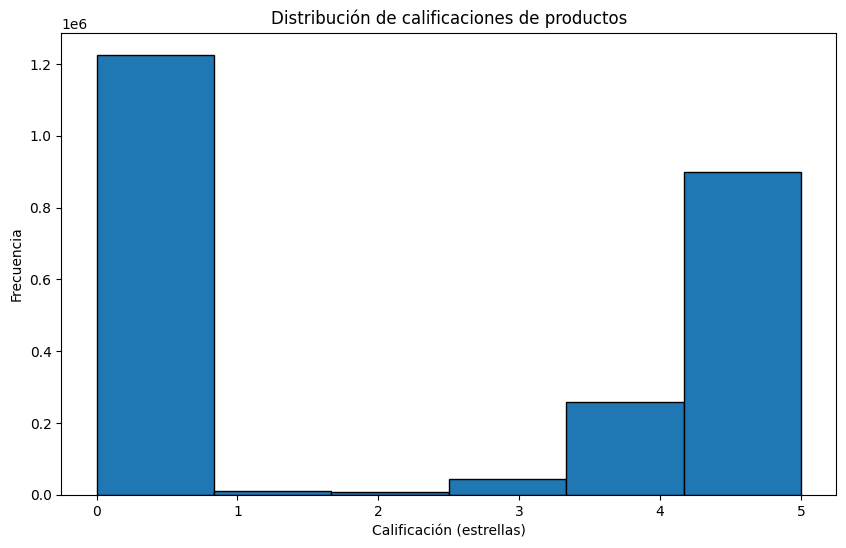

In [33]:
#Visualizations:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
plt.figure(figsize=(10,6))
plt.hist(df["stars"], bins=6, edgecolor='black')
plt.title("Distribución de calificaciones de productos")
plt.xlabel("Calificación (estrellas)")
plt.ylabel("Frecuencia")
plt.show()


Rating more common is 0.